<a href="https://colab.research.google.com/github/Vinod1403/IIIT-Hyderabad-Tutorials/blob/main/STP_Module_2_Lab2_Principal_Components_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Lab 2: Principal Components Analysis (PCA)


---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In [2]:
breast_data = load_breast_cancer().data
print("Features:", breast_data.shape)  ### 569 rows and 30 columns expected

breast_labels = np.reshape(load_breast_cancer().target, (569,1))
print("Target:", breast_labels.shape) ### 569 rows and 1 target column expected

Features: (569, 30)
Target: (569, 1)


**About the Breast Cancer Dataset**

- Features: 30 measurements (like radius, texture, perimeter, etc.) of cell nuclei from breast mass images.
- Labels: Benign (0) or Malignant (1).
- Goal: Use PCA to reduce the 30 features to 2 or 3, so we can visualize and see if benign and malignant tumors separate naturally.

**Example:**
If you had to describe a person’s face, you might use features like eye color, nose shape, etc. PCA would find the most important features that vary the most (e.g., face shape) and ignore less important ones (e.g., freckle count).

In [3]:
## Creating a Pandas dataframe for the dataset with the last column as the target variable

final_breast_data = np.concatenate([breast_data, breast_labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)

features = load_breast_cancer().feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
# Dividing the values into the features and labels for convenience later on

X = breast_dataset.iloc[:,:30].values
y = breast_dataset.iloc[:,30].values

print(np.shape(X), np.shape(y))

(569, 30) (569,)


### Step By Step Computation Of PCA
The below steps need to be followed to perform dimensionality reduction using PCA:

1. Standardization of the data

2. Computing the covariance matrix

3. Calculating the eigenvectors and eigenvalues

4. Computing the Principal Components

5. Reducing the dimensions of the data set


### 1. Standardization of the data

---
It is a common practice to normalize your data before feeding it to any machine learning algorithm.

To apply normalization, you will import StandardScaler module from the sklearn library and then apply scaling by doing fit_transform on the feature data. While applying StandardScaler, each feature of your data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.


**Why Standardize the Data?**


PCA is sensitive to the scale of features. If one feature is in meters and another in millimeters, PCA will be biased toward the larger scale.
Standardization (mean=0, std=1) puts all features on the same scale, so PCA treats them equally.

**Example:**
Imagine comparing heights (in cm) and weights (in kg). If you don’t scale, PCA might think height is more important just because the numbers are bigger.

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
print("Mean (approx):", np.mean(X_std))
print("Std Deviation (approx):", np.std(X_std))

Mean (approx): -6.118909323768877e-16
Std Deviation (approx): 1.0


Here's the data after scaling. Yes, we do loose the numerical meaning of the data, but that's okay. We are more interested in the relative positions of the data points with respect to each other.

In [6]:
X_std_df = pd.DataFrame(X_std)
X_std_df.columns = features
X_std_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


### 2. Computing the covariance matrix

---

Recall that covariance is always measured between 2 dimensions. If we have a data set with more than 2 dimensions, there is more than one covariance measurement that can be calculated. For example, from a 3 dimensional data set (dimensions x,y,z) you could calculate cov(x,y), cov(y,z) and cov(x,z). In fact, for an n-dimensional data set, you can calculate N combinatorial 2 different covariances.

Here we have 30 different features, so we will have to compute 435 different covariances.

Covariance Matrix Shape: (30, 30)


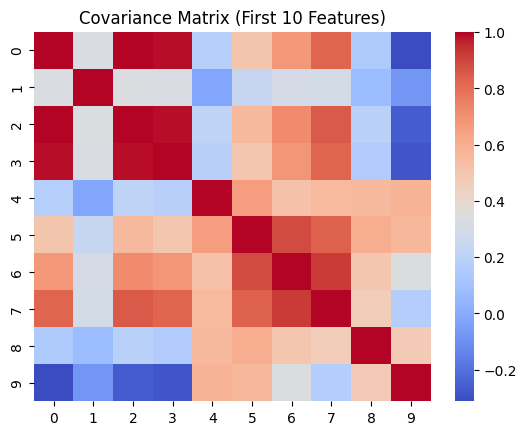

In [7]:
cov_mat = np.cov(X_std.T)
print("Covariance Matrix Shape:", cov_mat.shape)
sns.heatmap(cov_mat[:10, :10], cmap="coolwarm", annot=False)
plt.title("Covariance Matrix (First 10 Features)")
plt.show()

In [8]:
cov_mat.shape

(30, 30)

In [9]:
cov_mat_numpy = np.cov(X_std.T)
print("Covariance matrix first 5 rows and columns:")
print(cov_mat_numpy[0:5, 0:5])

Covariance matrix first 5 rows and columns:
[[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056]]


### 3. Calculating the eigenvectors and eigenvalues

---



In [10]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("Number of Eigenvalues:", len(eig_vals))

Number of Eigenvalues: 30


In [11]:
eig_vals.shape, eig_vecs.shape

((30,), (30, 30))

### 4. Computing the Principal Components

---




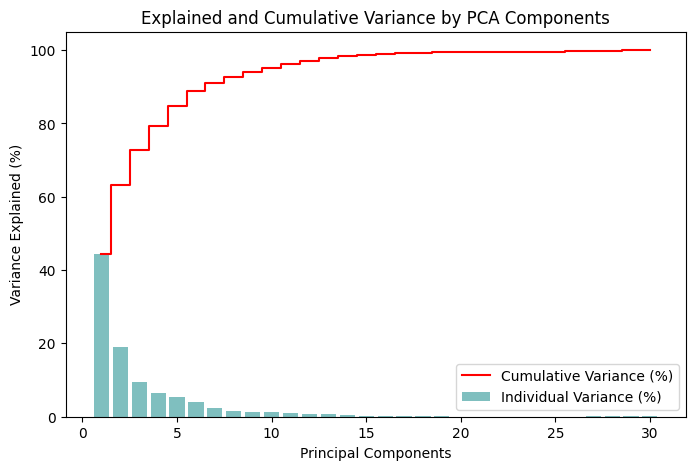

In [12]:
var_exp = (eig_vals / np.sum(eig_vals)) * 100
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(8,5))
plt.bar(range(1,31), var_exp, alpha=0.5, align='center', label='Individual Variance (%)', color='teal')
plt.step(range(1,31), cum_var_exp, where='mid', label='Cumulative Variance (%)', color='red')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained (%)')
plt.legend()
plt.title('Explained and Cumulative Variance by PCA Components')
plt.show()

In [13]:
# Stack top 3 principal components
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1),
                      eig_pairs[1][1].reshape(30,1),
                      eig_pairs[2][1].reshape(30,1)))

Y = X_std.dot(matrix_w)
Y[:5]

array([[ 9.19283683,  1.94858307, -1.12316616],
       [ 2.3878018 , -3.76817174, -0.52929269],
       [ 5.73389628, -1.0751738 , -0.55174759],
       [ 7.1229532 , 10.27558912, -3.23278955],
       [ 3.93530207, -1.94807157,  1.38976673]])

### 5. Reducing the dimensions of the data set

---



In [14]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1),
                      eig_pairs[1][1].reshape(30,1),
                      eig_pairs[2][1].reshape(30,1)))

Y = X_std.dot(matrix_w)

print(Y)

[[ 9.19283683  1.94858307 -1.12316616]
 [ 2.3878018  -3.76817174 -0.52929269]
 [ 5.73389628 -1.0751738  -0.55174759]
 ...
 [ 1.25617928 -1.90229671  0.56273053]
 [10.37479406  1.67201011 -1.87702933]
 [-5.4752433  -0.67063679  1.49044308]]


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
Y_sklearn = pca.fit_transform(X_std)
print("Shape after PCA:", Y_sklearn.shape)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Cumulative Explained Variance Ratio:", np.cumsum(pca.explained_variance_ratio_))

Shape after PCA: (569, 3)
Explained Variance Ratio: [0.44272026 0.18971182 0.09393163]
Cumulative Explained Variance Ratio: [0.44272026 0.63243208 0.72636371]


In [16]:
pca_df = pd.DataFrame(data=Y_sklearn, columns=['PC1', 'PC2', 'PC3'])
pca_df['Label'] = ['Benign' if l == 0 else 'Malignant' for l in y]
pca_df.head()

,PC1,PC2,PC3,Label
0,9.192837,1.948583,-1.123166,Benign
1,2.387802,-3.768172,-0.529293,Benign
2,5.733896,-1.075174,-0.551748,Benign
3,7.122953,10.275589,-3.232790,Benign
4,3.935302,-1.948072,1.389767,Benign


## Let's visualize our dataset in 2 and 3 dimensions now

---



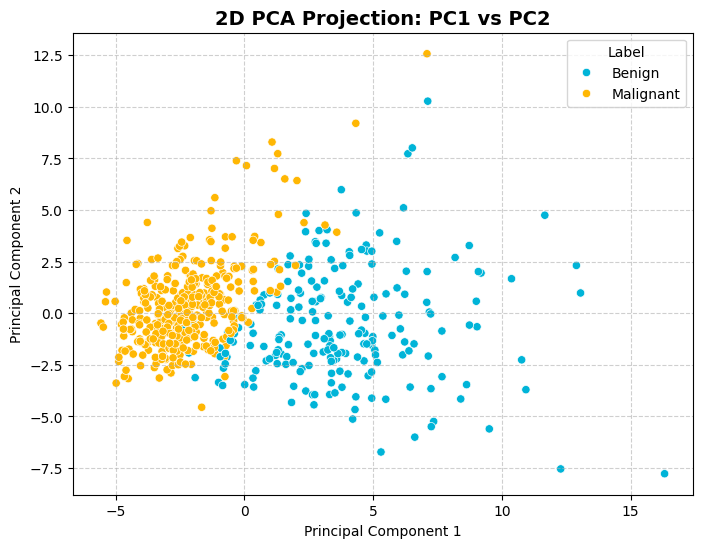

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Label', palette=['#00b4d8','#ffb703'])
plt.title('2D PCA Projection: PC1 vs PC2', fontsize=14, fontweight='bold')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [19]:
import plotly.express as px

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Label',
                    title='3D PCA Visualization of Breast Cancer Data',
                    color_discrete_map={"Benign": "aqua", "Malignant": "orange"})
fig.update_traces(marker=dict(size=5))
fig.show()

In [21]:
import plotly.graph_objects as go
import plotly.express as px

### Question:
Referring to the plot above, can you reason why PCA can be a good candidate before training models for Machine learning?

#### Answer:
You can see that the first 2 principal components were able to differentiate the benign and malignant tumours in our breast cancer dataset. This motivates the use of the second application of PCA, which was to reduce the number of features in the dataset so that the machine learning algorithm can be trained without overfitting.



Let us now try and visualize this in the first 3 Principal Components space.

Exersise
1. How many components do you need to retain 90% of the variance in the data?
Based on the cumulative variance plot and results:

Around 10 principal components are needed to retain 90% of the variance in the dataset.
2. Find one other use case that makes use of PCA and summarize how it is applied to the problem domain.
Use Case: Face Recognition (Eigenfaces Method)

Application:

Each face image is represented as a high-dimensional vector (pixels = features).

PCA is applied to extract “eigenfaces” — key patterns that represent how faces vary (eyes, mouth, shape, etc.).

When a new face is given, it’s projected onto these principal components and compared with stored face representations.

Why PCA helps:

Reduces image dimensions (from thousands of pixels to a few hundred components).

Removes noise and redundancy.

Speeds up recognition while maintaining high accuracy.